<a href="https://colab.research.google.com/github/utkarshg1/Pytorch/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.5.1+cu124'

## 1. Data Creation

In [3]:
torch.manual_seed(21)
weight = 0.7
bias = 2.1

start = 0
end = 1.02
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
noise = torch.normal(mean=0.0, std=0.1, size=X.shape)
y = weight * X + bias + noise

In [4]:
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800],
        [1.0000]])

In [5]:
y

tensor([[2.0761],
        [2.0047],
        [2.1436],
        [2.1595],
        [2.0607],
        [2.1156],
        [2.3039],
        [2.2940],
        [2.1013],
        [2.1420],
        [2.2398],
        [2.2764],
        [2.3557],
        [2.2282],
        [2.2661],
        [2.4079],
        [2.4822],
        [2.3116],
        [2.2703],
        [2.5088],
        [2.5560],
        [2.5115],
        [2.4344],
        [2.3536],
        [2.5661],
        [2.4489],
        [2.4047],
        [2.5484],
        [2.4444],
        [2.4962],
        [2.5411],
        [2.5093],
        [2.4921],
        [2.6146],
        [2.4971],
        [2.5268],
        [2.6121],
        [2.5872],
        [2.7060],
        [2.5804],
        [2.5896],
        [2.6880],
        [2.6017],
        [2.5938],
        [2.6376],
        [2.8166],
        [2.4947],
        [2.5898],
        [2.8590],
        [2.7171],
        [2.6737]])

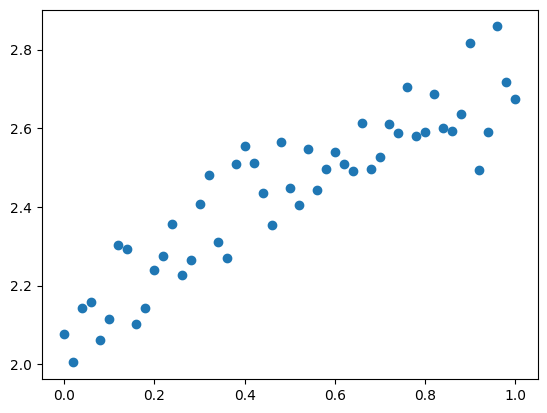

In [6]:
plt.scatter(X, y)

In [7]:
X.shape

torch.Size([51, 1])

In [8]:
y.shape

torch.Size([51, 1])

In [9]:
X.dtype

torch.float32

In [10]:
y.dtype

torch.float32

## 2. Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
xtrain.shape

torch.Size([40, 1])

In [14]:
ytrain.shape

torch.Size([40, 1])

In [15]:
xtest.shape

torch.Size([11, 1])

In [16]:
ytest.shape

torch.Size([11, 1])

## 3. Visualize data

In [17]:
def plot_predictions(xtrain, ytrain, xtest, ytest, predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(xtrain, ytrain, label="train")
  plt.scatter(xtest, ytest, label="test")
  if predictions is not None:
    plt.plot(xtest, predictions, label="predictions", c="orange")
  plt.legend()
  plt.show()

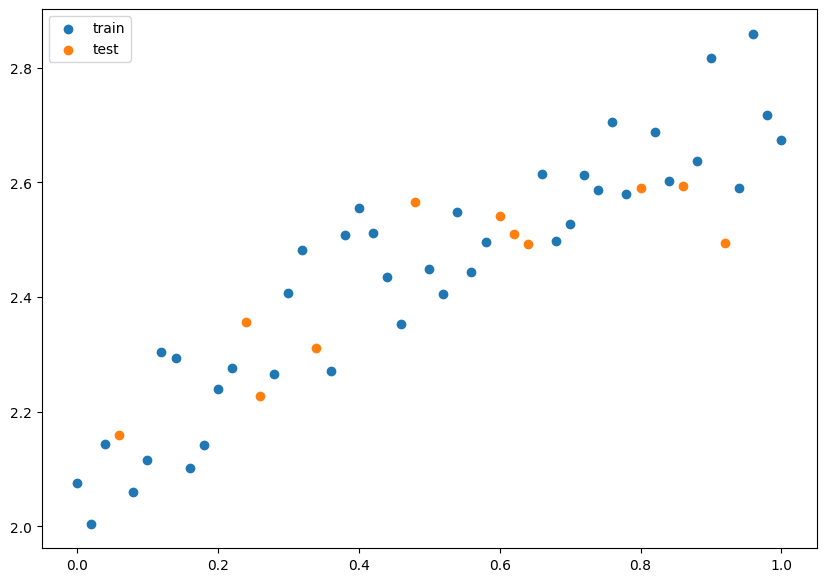

In [18]:
plot_predictions(xtrain, ytrain, xtest, ytest)

## 4. Building Model

In [19]:
class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


### Checking pytorch model

In [20]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [21]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [23]:
weight, bias

(0.7, 2.1)

In [24]:
with torch.inference_mode():
  ypred_test = model_0(xtest)

In [25]:
ypred_test

tensor([[0.4184],
        [0.3982],
        [0.4386],
        [0.2096],
        [0.2904],
        [0.3376],
        [0.2433],
        [0.3443],
        [0.1490],
        [0.3308],
        [0.2163]])

In [26]:
ytest

tensor([[2.5938],
        [2.5896],
        [2.4947],
        [2.3557],
        [2.5661],
        [2.5093],
        [2.3116],
        [2.4921],
        [2.1595],
        [2.5411],
        [2.2282]])

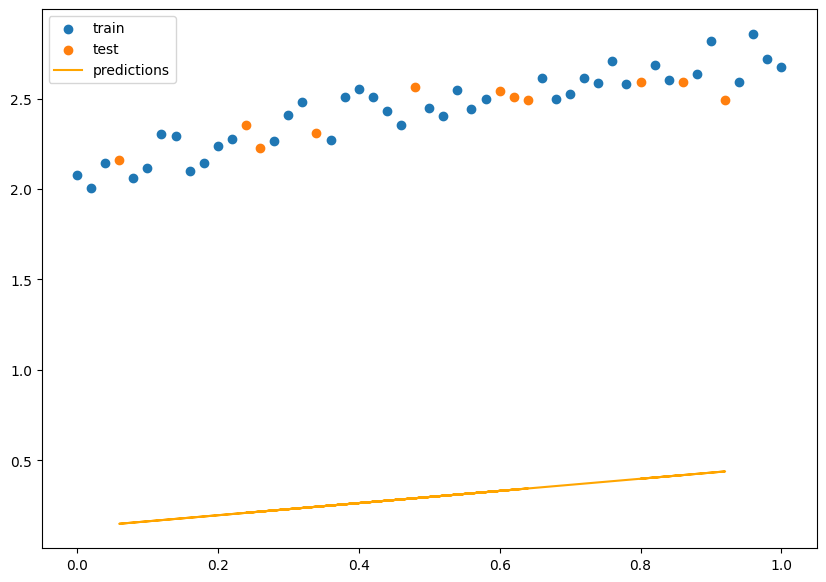

In [27]:
plot_predictions(xtrain, ytrain, xtest, ytest, predictions=ypred_test)

### Training Loop

In [28]:
loss_fn = nn.L1Loss()

In [29]:
loss_fn

L1Loss()

In [30]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [31]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [32]:
torch.manual_seed(42)
epochs = 1000

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # Training loop
  model_0.train()
  ypred = model_0(xtrain)
  loss = loss_fn(ypred, ytrain)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing Loop
  model_0.eval()

  with torch.inference_mode():
    ypred_test = model_0(xtest)

  test_loss = loss_fn(ypred_test, ytest)

  if epoch % 50 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")
    print(f"Params {model_0.state_dict()}")


Epoch: 0 | Train Loss: 2.145509958267212 | Test Loss: 2.120610237121582
Params OrderedDict([('weights', tensor([0.3416])), ('bias', tensor([0.1388]))])
Epoch: 50 | Train Loss: 1.5244779586791992 | Test Loss: 1.490453839302063
Params OrderedDict([('weights', tensor([0.5876])), ('bias', tensor([0.6388]))])
Epoch: 100 | Train Loss: 0.9034463167190552 | Test Loss: 0.8602976202964783
Params OrderedDict([('weights', tensor([0.8336])), ('bias', tensor([1.1388]))])
Epoch: 150 | Train Loss: 0.288920134305954 | Test Loss: 0.25860288739204407
Params OrderedDict([('weights', tensor([1.0767])), ('bias', tensor([1.6358]))])
Epoch: 200 | Train Loss: 0.1336853802204132 | Test Loss: 0.15124475955963135
Params OrderedDict([('weights', tensor([1.0986])), ('bias', tensor([1.8623]))])
Epoch: 250 | Train Loss: 0.11172749102115631 | Test Loss: 0.13135486841201782
Params OrderedDict([('weights', tensor([1.0116])), ('bias', tensor([1.9193]))])
Epoch: 300 | Train Loss: 0.09352409839630127 | Test Loss: 0.1132383

In [33]:
with torch.inference_mode():
  ypred_test = model_0(xtest)

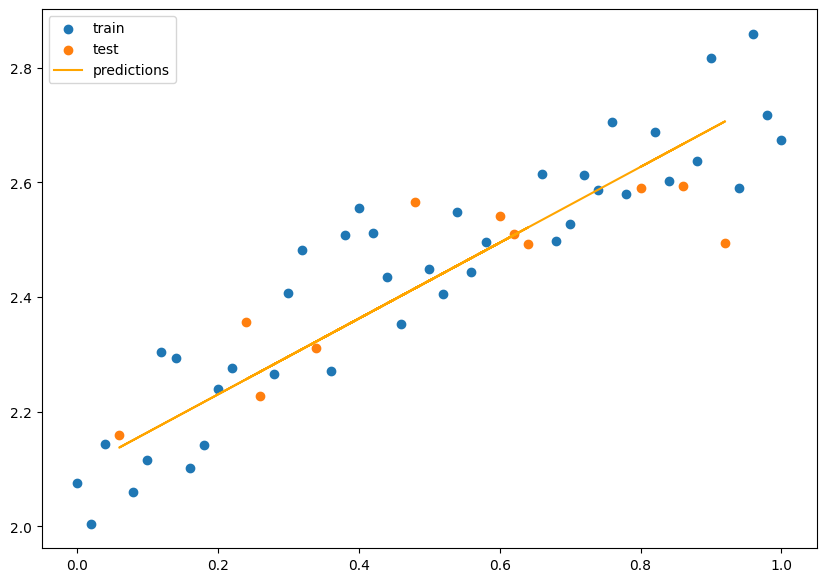

In [34]:
plot_predictions(xtrain, ytrain, xtest, ytest, predictions=ypred_test)

In [35]:
train_loss_values

[tensor(2.1455, grad_fn=<MeanBackward0>),
 tensor(1.5245, grad_fn=<MeanBackward0>),
 tensor(0.9034, grad_fn=<MeanBackward0>),
 tensor(0.2889, grad_fn=<MeanBackward0>),
 tensor(0.1337, grad_fn=<MeanBackward0>),
 tensor(0.1117, grad_fn=<MeanBackward0>),
 tensor(0.0935, grad_fn=<MeanBackward0>),
 tensor(0.0851, grad_fn=<MeanBackward0>),
 tensor(0.0806, grad_fn=<MeanBackward0>),
 tensor(0.0767, grad_fn=<MeanBackward0>),
 tensor(0.0751, grad_fn=<MeanBackward0>),
 tensor(0.0741, grad_fn=<MeanBackward0>),
 tensor(0.0731, grad_fn=<MeanBackward0>),
 tensor(0.0725, grad_fn=<MeanBackward0>),
 tensor(0.0723, grad_fn=<MeanBackward0>),
 tensor(0.0721, grad_fn=<MeanBackward0>),
 tensor(0.0719, grad_fn=<MeanBackward0>),
 tensor(0.0717, grad_fn=<MeanBackward0>),
 tensor(0.0716, grad_fn=<MeanBackward0>),
 tensor(0.0715, grad_fn=<MeanBackward0>)]

In [36]:
train_loss_numpy = [i.detach().numpy() for i in train_loss_values]
train_loss_numpy

[array(2.14551, dtype=float32),
 array(1.524478, dtype=float32),
 array(0.9034463, dtype=float32),
 array(0.28892013, dtype=float32),
 array(0.13368538, dtype=float32),
 array(0.11172749, dtype=float32),
 array(0.0935241, dtype=float32),
 array(0.08505965, dtype=float32),
 array(0.08056352, dtype=float32),
 array(0.07670628, dtype=float32),
 array(0.07507193, dtype=float32),
 array(0.07408096, dtype=float32),
 array(0.07313997, dtype=float32),
 array(0.07253026, dtype=float32),
 array(0.07230976, dtype=float32),
 array(0.0720893, dtype=float32),
 array(0.0718921, dtype=float32),
 array(0.07174931, dtype=float32),
 array(0.07160652, dtype=float32),
 array(0.07146372, dtype=float32)]

In [37]:
test_loss_values

[tensor(2.1206),
 tensor(1.4905),
 tensor(0.8603),
 tensor(0.2586),
 tensor(0.1512),
 tensor(0.1314),
 tensor(0.1132),
 tensor(0.1017),
 tensor(0.0929),
 tensor(0.0871),
 tensor(0.0833),
 tensor(0.0805),
 tensor(0.0783),
 tensor(0.0756),
 tensor(0.0727),
 tensor(0.0698),
 tensor(0.0684),
 tensor(0.0677),
 tensor(0.0670),
 tensor(0.0664)]

In [38]:
test_loss_numpy = [i.detach().numpy() for i in test_loss_values]
test_loss_numpy

[array(2.1206102, dtype=float32),
 array(1.4904538, dtype=float32),
 array(0.8602976, dtype=float32),
 array(0.2586029, dtype=float32),
 array(0.15124476, dtype=float32),
 array(0.13135487, dtype=float32),
 array(0.11323831, dtype=float32),
 array(0.10165709, dtype=float32),
 array(0.092853, dtype=float32),
 array(0.08706147, dtype=float32),
 array(0.08325503, dtype=float32),
 array(0.08047403, dtype=float32),
 array(0.07829393, dtype=float32),
 array(0.07558215, dtype=float32),
 array(0.07266142, dtype=float32),
 array(0.06980333, dtype=float32),
 array(0.06838619, dtype=float32),
 array(0.06771564, dtype=float32),
 array(0.06704512, dtype=float32),
 array(0.06637456, dtype=float32)]

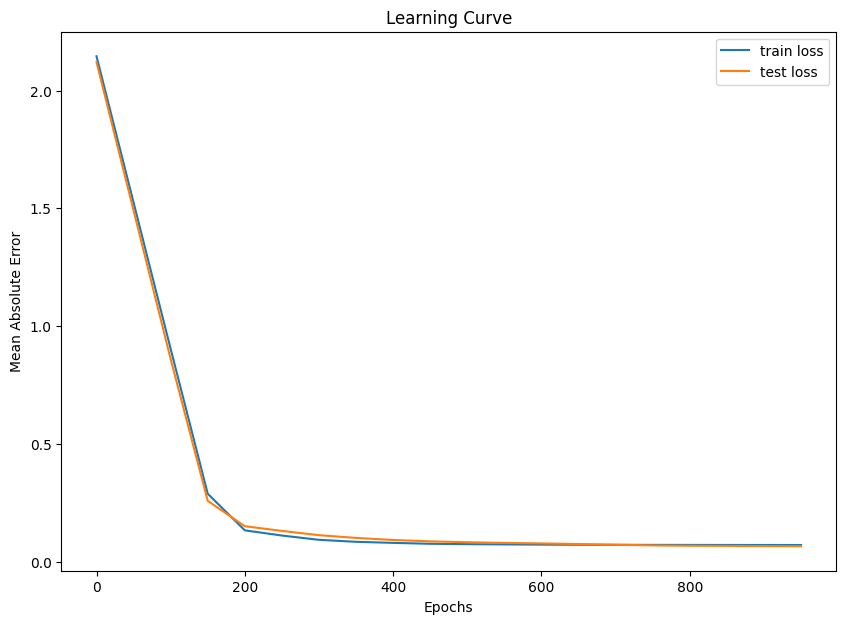

In [39]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count, train_loss_numpy, label="train loss")
plt.plot(epoch_count, test_loss_numpy, label="test loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Saving a model in pytorch

In [40]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6614])), ('bias', tensor([2.0978]))])

In [41]:
from pathlib import Path

In [46]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving Model to : models/model_0.pth


## Loading model

In [47]:
checkpoint = torch.load(MODEL_SAVE_PATH, weights_only=True)
checkpoint

OrderedDict([('weights', tensor([0.6614])), ('bias', tensor([2.0978]))])

In [48]:
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [50]:
model_1.load_state_dict(checkpoint)

<All keys matched successfully>

In [51]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.6614])), ('bias', tensor([2.0978]))])